In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyarrow as pa
import openpyxl as op
from rapidfuzz import process, fuzz
import re
import torch
#import cupy as cp
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss
from sklearn.model_selection import cross_val_score
from sklearn.calibration import calibration_curve

ModuleNotFoundError: No module named 'xgboost'

In [2]:

# Bring in csv needed for the various variables needing to be created
evan_miya_all_years_filtered = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Second Cleaning and Filtered\evan_miya_all_years_filtered.csv", encoding="ISO-8859-1", header=0)
draft_data_filtered = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Second Cleaning and Filtered\combined_draft_data_filtered.csv", encoding = 'ISO-8859-1', header=0)
champion_predictor_final = pd.read_csv(r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Combined after Cleaning\champion_predictor_final.csv", encoding = 'ISO-8859-1', header=0)

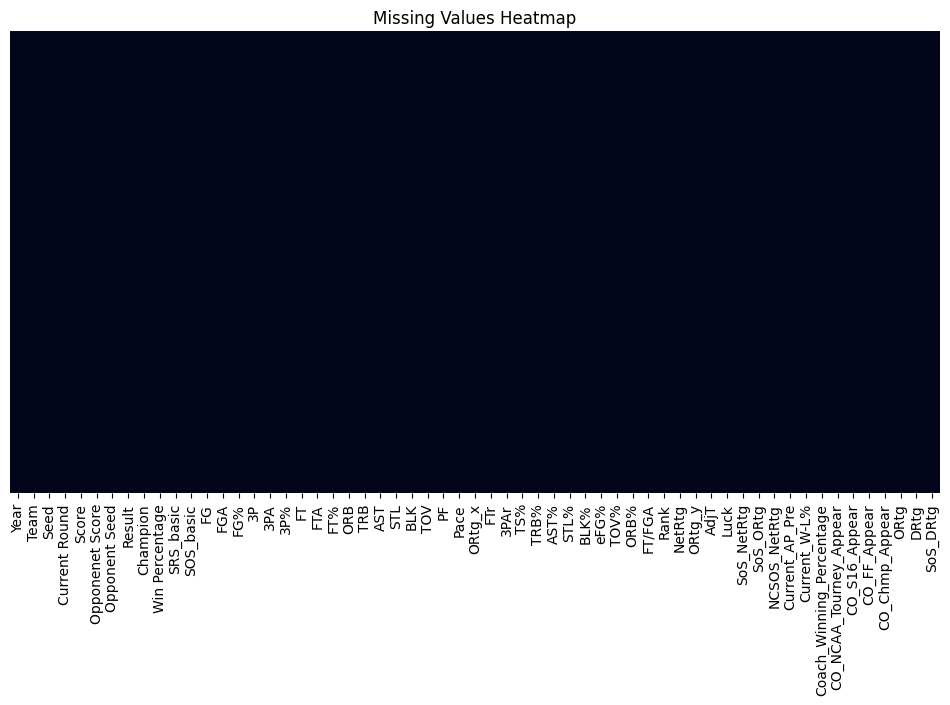

In [3]:

plt.figure(figsize=(12, 6))
sns.heatmap(champion_predictor_final.isna(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [4]:
print(champion_predictor_final.columns)

champion_predictor_final = champion_predictor_final.drop(columns=['BY YEAR NO', 'Team No', 'merge_key','clean_team', 'merge_key_new','Team_stats', 'merge_key_stats',
                                                                  'clean_team_stats', 'merge_key_new_stats', 'Team_corrected_stats', 'Opponent'])
print(champion_predictor_final.columns)

Index(['Year', 'Team', 'Seed', 'Current Round', 'Score', 'Opponenet Score',
       'Opponent Seed', 'Result', 'Champion', 'Win Percentage', 'SRS_basic',
       'SOS_basic', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%',
       'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'Pace', 'ORtg_x', 'FTr',
       '3PAr', 'TS%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'eFG%', 'TOV%', 'ORB%',
       'FT/FGA', 'Rank', 'NetRtg', 'ORtg_y', 'AdjT', 'Luck', 'SoS_NetRtg',
       'SoS_ORtg', 'NCSOS_NetRtg', 'Current_AP_Pre', 'Current_W-L%',
       'Coach_Winning_Percentage', 'CO_NCAA_Tourney_Appear', 'CO_S16_Appear',
       'CO_FF_Appear', 'CO_Chmp_Appear', 'ORtg', 'DRtg', 'SoS_DRtg'],
      dtype='object')


KeyError: "['BY YEAR NO', 'Team No', 'merge_key', 'clean_team', 'merge_key_new', 'Team_stats', 'merge_key_stats', 'clean_team_stats', 'merge_key_new_stats', 'Team_corrected_stats', 'Opponent'] not found in axis"

In [ ]:
champion_predictor_final.columns = ['Year', 'Team', 'Seed', 'Current Round', 'Score', 'Opponenet Score', 'Opponent Seed', 'Result', 'Champion', 
                                 'Win Percentage', 'SRS_basic', 'SOS_basic', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'TRB', 'AST', 
                                 'STL', 'BLK', 'TOV', 'PF', 'Pace', 'ORtg_x', 'FTr', '3PAr', 'TS%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'eFG%', 'TOV%', 'ORB%', 
                                 'FT/FGA', 'Rank','NetRtg', 'ORtg_y', 'AdjT', 'Luck', 'SoS_NetRtg', 'SoS_ORtg', 'NCSOS_NetRtg', 'Current_AP_Pre', 'Current_W-L%', 
                                 'Coach_Winning_Percentage', 'CO_NCAA_Tourney_Appear', 'CO_S16_Appear', 'CO_FF_Appear', 'CO_Chmp_Appear', 'ORtg', 'DRtg', 'SoS_DRtg']

In [5]:
print(champion_predictor_final.columns)
# Example: Replace all headers explicitly
champion_predictor_final.columns = ['Year', 'Team', 'Seed', 'Current Round', 'Score', 'Opponenet Score',
       'Opponent Seed', 'Result', 'Champion', 'Win Percentage', 'SRS_basic',
       'SOS_basic', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%',
       'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'Pace', 'ORtg_x', 'FTr',
       '3PAr', 'TS%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'eFG%', 'TOV%', 'ORB%',
       'FT/FGA', 'Rank', 'NetRtg', 'ORtg_y', 'AdjT', 'Luck', 'SoS_NetRtg',
       'SoS_ORtg', 'NCSOS_NetRtg', 'Current_AP_Pre', 'Current_W-L%',
       'Coach_Winning_Percentage', 'CO_NCAA_Tourney_Appear', 'CO_S16_Appear',
       'CO_FF_Appear', 'CO_Chmp_Appear', 'ORtg', 'DRtg', 'SoS_DRtg']

champion_predictor_final.columns

test_bracket_set = champion_predictor_final[(champion_predictor_final["Year"] == 2025)]
train_bracket_set = champion_predictor_final[(champion_predictor_final["Year"] < 2025)]

output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Combined after Cleaning\champion_predictor_final.csv"
champion_predictor_final.to_csv(output_path, index=False)

Index(['Year', 'Team', 'Seed', 'Current Round', 'Score', 'Opponenet Score',
       'Opponent Seed', 'Result', 'Champion', 'Win Percentage', 'SRS_basic',
       'SOS_basic', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%',
       'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'Pace', 'ORtg_x', 'FTr',
       '3PAr', 'TS%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'eFG%', 'TOV%', 'ORB%',
       'FT/FGA', 'Rank', 'NetRtg', 'ORtg_y', 'AdjT', 'Luck', 'SoS_NetRtg',
       'SoS_ORtg', 'NCSOS_NetRtg', 'Current_AP_Pre', 'Current_W-L%',
       'Coach_Winning_Percentage', 'CO_NCAA_Tourney_Appear', 'CO_S16_Appear',
       'CO_FF_Appear', 'CO_Chmp_Appear', 'ORtg', 'DRtg', 'SoS_DRtg'],
      dtype='object')


In [6]:
test_bracket_set = champion_predictor_final[(champion_predictor_final["Year"] == 2025)]
train_bracket_set = champion_predictor_final[(champion_predictor_final["Year"] < 2025)]

In [7]:
# Create a probability of winning the championship
# Split data into training and test data sets
# Split data
# Define the feature subset you want to keep
selected_columns = ['Champion','Year', 'Seed', 'Current Round', 'Score', 'Opponenet Score',
       'Opponent Seed', 'Result', 'Win Percentage', 'SRS_basic',
       'SOS_basic', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%',
       'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'Pace', 'ORtg_x', 'FTr',
       '3PAr', 'TS%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'eFG%', 'TOV%', 'ORB%',
       'FT/FGA', 'Rank', 'NetRtg', 'ORtg_y', 'AdjT', 'Luck', 'SoS_NetRtg',
       'SoS_ORtg', 'NCSOS_NetRtg', 'Current_AP_Pre', 'Current_W-L%',
       'Coach_Winning_Percentage', 'CO_NCAA_Tourney_Appear', 'CO_S16_Appear',
       'CO_FF_Appear', 'CO_Chmp_Appear', 'ORtg', 'DRtg', 'SoS_DRtg']

# Apply column subset to training and testing splits
train_champion_predictor_df = champion_predictor_final[(champion_predictor_final["Year"] < 2025)][selected_columns]
test_champion_predictor_df = champion_predictor_final[(champion_predictor_final["Year"] == 2025)][selected_columns]

x_train_champion_predictor_df = train_champion_predictor_df.drop(columns=["Champion"])
y_train_champion_predictor_df = train_champion_predictor_df["Champion"]
x_test_champion_predictor_df = test_champion_predictor_df.drop(columns=["Champion"])
y_test_champion_predictor_df = test_champion_predictor_df["Champion"]

#Standardize X sets
x_train_champion_predictor_df_scaled = preprocessing.StandardScaler().fit(x_train_champion_predictor_df).transform(x_train_champion_predictor_df)
x_test_champion_predictor_df_scaled = preprocessing.StandardScaler().fit(x_test_champion_predictor_df).transform(x_test_champion_predictor_df)


# Convert back to DataFrame
x_train_champion_predictor_df_scaled = pd.DataFrame(x_train_champion_predictor_df_scaled, columns=x_train_champion_predictor_df.columns, index=x_train_champion_predictor_df.index)
x_test_champion_predictor_df_scaled = pd.DataFrame(x_test_champion_predictor_df_scaled, columns=x_test_champion_predictor_df.columns, index=x_test_champion_predictor_df.index)

#Look at non-standardized data
print(x_train_champion_predictor_df.head())
print(x_test_champion_predictor_df.head())

#Look at stanardized data
print(x_train_champion_predictor_df_scaled.head())
print(x_test_champion_predictor_df_scaled.head())

     Year  Seed  Current Round  Score  Opponenet Score  Opponent Seed  Result  \
134  2024     1             64     91               52             16       1   
135  2024    16             64     52               91              1       0   
136  2024     8             64     65               77              9       0   
137  2024     9             64     77               65              8       1   
138  2024     5             64     69               65             12       1   

     Win Percentage  SRS_basic  SOS_basic  ...  Current_AP_Pre  Current_W-L%  \
134           0.925      26.70       8.70  ...             6.0         0.925   
135           0.629      -5.09      -3.24  ...             0.0         0.629   
136           0.735      13.26       4.61  ...            10.0         0.735   
137           0.647      12.77       8.50  ...             0.0         0.647   
138           0.703      14.68       8.37  ...            17.0         0.703   

     Coach_Winning_Percentage  C

In [8]:
# Check before dropping
print("NaNs in training set:", x_train_champion_predictor_df.isna().sum().sum())
print("NaNs in test set:", x_test_champion_predictor_df.isna().sum().sum())

# Drop rows with any NaNs
#x_train_champion_predictor_df = x_train_champion_predictor_df.dropna()
#x_test_champion_predictor_df = x_test_champion_predictor_df.dropna()

# If you also want to keep y aligned:
y_train_champion_predictor_df = y_train_champion_predictor_df.loc[x_train_champion_predictor_df.index]
y_test_champion_predictor_df = y_test_champion_predictor_df.loc[x_test_champion_predictor_df.index]

# Confirm cleaned shapes
print("Training shape after drop:", x_train_champion_predictor_df.shape)
print("Test shape after drop:", x_test_champion_predictor_df.shape)

NaNs in training set: 0
NaNs in test set: 0
Training shape after drop: (1510, 57)
Test shape after drop: (134, 57)


# Non-Standardized Data
## Logistic Regression

In [9]:
LogReg = LogisticRegression(max_iter = 100000)
LogReg.fit(x_train_champion_predictor_df, y_train_champion_predictor_df)
log_probs = LogReg.predict_proba(x_test_champion_predictor_df)[:, 1] # Probability of winning the championship

## Random Forest Classifier

In [10]:
rf_model = RandomForestClassifier(  n_estimators=10000, max_depth=3, min_samples_split=4, min_samples_leaf=3,
    max_features='sqrt', class_weight='balanced', random_state=42)
rf_model.fit(x_train_champion_predictor_df, y_train_champion_predictor_df)
rf_probs = rf_model.predict_proba(x_test_champion_predictor_df)[:, 1] # Probability of winning the championship

## Gradient Boosting Classifier

In [11]:
gb_model = GradientBoostingClassifier(n_estimators=10000, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(x_train_champion_predictor_df, y_train_champion_predictor_df)
gb_probs = gb_model.predict_proba(x_test_champion_predictor_df)[:, 1] # Probability of winning the championship

## GPU Powered XGBoost

In [12]:
#  Define hyperparameter grid
param_grid = {"learning_rate": [0.01], "max_depth": [3], "n_estimators": [500], "subsample": [0.5], "colsample_bytree": [0.75]}

#  Create GPU-bound base estimator
xgb_estimator = xgb.XGBClassifier(tree_method="hist", device="cuda")

# Set up GridSearchCV
xgb_model = GridSearchCV(estimator=xgb_estimator, param_grid=param_grid, cv=5, scoring="roc_auc", verbose=2, n_jobs=1)

#  Fit model on CPU-based training data
xgb_model.fit(x_train_champion_predictor_df, y_train_champion_predictor_df)

# Display best hyperparameters
print("Best Parameters:", xgb_model.best_params_)

# Extract trained booster (now tuned and trained)
booster = xgb_model.best_estimator_.get_booster()

# Convert test data to CuPy-backed GPU DMatrix
dtest_gpu = xgb.DMatrix(cp.array(x_test_champion_predictor_df))

#  Force booster to GPU-only prediction
booster.set_param({"device": "cuda"})

# Convert test data to CuPy array
x_test_gpu = cp.array(x_test_champion_predictor_df)

# Run fast GPU-based prediction
xgb_probs_gpu = booster.inplace_predict(x_test_gpu, validate_features=False)

# Convert results to NumPy if needed downstream
xgb_probs = cp.asnumpy(xgb_probs_gpu)

# Parameter Grid param_grid = {"learning_rate": [0.01, 0.1, 0.15], "max_depth": [3, 5, 7], "n_estimators": [100, 300, 500], "subsample": [0.5, 0.75, 1.0], "colsample_bytree": [0.5, 0.75, 1.0]}
#  Best Parameters: {'colsample_bytree': 0.75, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 1.0}

Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\Colt Meyer\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:729: UserWarning: [18:59:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END colsample_bytree=0.75, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=0.75, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=0.75, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=0.75, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=0.75, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.5; total time=   0.6s
Best Parameters: {'colsample_bytree': 0.75, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.5}


In [13]:
# Create DataFrame with all the probabilities created
champion_predictor_probs = pd.DataFrame({"Logistic": log_probs, "RanFor": rf_probs, "GradBoost": gb_probs, "XGBoost": xgb_probs})
# Create two combined probabiliti that takes all of them and puts them together.  1) Mean of the 4 and 2) A weighted scale
champion_predictor_probs ["Prob Mean"] = champion_predictor_probs .mean(axis=1)
champion_predictor_probs ["Combined"] = (0.3 * champion_predictor_probs ["Logistic"] + 0.5 * champion_predictor_probs ["RanFor"] +
    0.025 * champion_predictor_probs ["GradBoost"] + 0.175 * champion_predictor_probs ["XGBoost"])

print(champion_predictor_probs)

          Logistic    RanFor     GradBoost   XGBoost  Prob Mean  Combined
0    2.822610e-119  0.001699  1.301728e-09  0.001233   0.000733  0.001065
1     1.790085e-67  0.008667  1.301728e-09  0.001233   0.002475  0.004549
2     4.371543e-75  0.007107  1.301728e-09  0.000486   0.001898  0.003638
3     1.421540e-83  0.003761  1.301728e-09  0.000454   0.001054  0.001960
4    7.659773e-113  0.001881  1.301728e-09  0.000720   0.000650  0.001067
..             ...       ...           ...       ...        ...       ...
129   9.992240e-01  0.493339  1.301728e-09  0.160799   0.413340  0.574576
130   3.787580e-03  0.312690  1.301728e-09  0.045843   0.090580  0.165503
131   8.225785e-01  0.331653  1.301728e-09  0.071911   0.306536  0.425185
132   9.999933e-01  0.775650  9.999998e-01  0.401548   0.794298  0.783094
133   9.963678e-01  0.507150  1.301728e-09  0.200758   0.426069  0.587618

[134 rows x 6 columns]


# Standardized Data
## Logistic Regression

In [14]:
LogRegs_scaled = LogisticRegression(max_iter = 100000)
LogRegs_scaled.fit(x_train_champion_predictor_df_scaled, y_train_champion_predictor_df)
log_probs_scaled = LogRegs_scaled.predict_proba(x_test_champion_predictor_df_scaled)[:, 1] # Probability of winning the championship

## Random Forest Classifier

In [15]:
rf_models_scaled = RandomForestClassifier(  n_estimators=1000, max_depth=3, min_samples_split=4, min_samples_leaf=3,
    max_features='sqrt', class_weight='balanced', random_state=42)
rf_models_scaled.fit(x_train_champion_predictor_df_scaled, y_train_champion_predictor_df)
rf_probs_scaled = rf_models_scaled.predict_proba(x_test_champion_predictor_df_scaled)[:, 1] # Probability of winning the championship

## Gradient Boosting Classifier

In [16]:
gb_models_scaled = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=5, random_state=42)
gb_models_scaled.fit(x_train_champion_predictor_df_scaled, y_train_champion_predictor_df)
gb_probs_scaled = gb_models_scaled.predict_proba(x_test_champion_predictor_df_scaled)[:, 1] # Probability of winning the championship

## GPU Powered XGBoost

In [17]:
#  Define hyperparameter grid
param_grid = {"learning_rate": [0.01], "max_depth": [3], "n_estimators": [500], "subsample": [0.5], "colsample_bytree": [0.75]}

#  Create GPU-bound base estimator
xgb_estimator = xgb.XGBClassifier(tree_method="hist", device="cuda")


# Set up GridSearchCV
xgb_model_scaled = GridSearchCV(estimator=xgb_estimator, param_grid=param_grid, cv=5, scoring="roc_auc", verbose=2, n_jobs=1)

#  Fit model on CPU-based training data
xgb_model_scaled.fit(x_train_champion_predictor_df_scaled, y_train_champion_predictor_df)

# Extract trained booster (now tuned and trained)
booster = xgb_model.best_estimator_.get_booster()

# Convert test data to CuPy-backed GPU DMatrix
dtest_gpu = xgb.DMatrix(cp.array(x_test_champion_predictor_df_scaled))

#  Force booster to GPU-only prediction
booster.set_param({"device": "cuda"})

x_test_gpu = cp.array(x_test_champion_predictor_df_scaled)

# Run fast GPU-based prediction
xgb_probs_scaled = booster.inplace_predict(x_test_gpu, validate_features=False)

# Convert results to NumPy if needed downstream
xgb_probs_scaled = cp.asnumpy(xgb_probs_scaled)

# Display best hyperparameters
print("Best Parameters:", xgb_model.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END colsample_bytree=0.75, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.5; total time=   0.9s
[CV] END colsample_bytree=0.75, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.5; total time=   0.9s
[CV] END colsample_bytree=0.75, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=0.75, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=0.75, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.5; total time=   0.8s
Best Parameters: {'colsample_bytree': 0.75, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.5}


In [18]:
# Create DataFrame with all the probabilities created
champion_predictor_probs_scaled = pd.DataFrame({"Logistic Scaled": log_probs_scaled, "RanFor Scaled": rf_probs_scaled, "GradBoost Scaled": gb_probs_scaled, "XGBoost Scaled": xgb_probs_scaled})
# Create two combined probabiliti that takes all of them and puts them together.  1) Mean of the 4 and 2) A weighted scale
champion_predictor_probs_scaled ["Prob Mean Scaled"] = champion_predictor_probs_scaled .mean(axis=1)
champion_predictor_probs_scaled["Combined Scaled"] = (0.3 * champion_predictor_probs_scaled["Logistic Scaled"] + 0.5 * champion_predictor_probs_scaled["RanFor Scaled"] +
    0.025 * champion_predictor_probs_scaled["GradBoost Scaled"] + 0.175 * champion_predictor_probs_scaled["XGBoost Scaled"])

print(champion_predictor_probs_scaled)

     Logistic Scaled  RanFor Scaled  GradBoost Scaled  XGBoost Scaled  \
0       2.031453e-09       0.000000      1.301728e-09        0.004853   
1       3.022154e-12       0.002613      1.301728e-09        0.007158   
2       2.598334e-07       0.002615      1.301728e-09        0.006508   
3       3.679462e-08       0.003190      1.301728e-09        0.010592   
4       2.477548e-07       0.001769      1.301728e-09        0.008216   
..               ...            ...               ...             ...   
129     5.329274e-01       0.670780      9.999998e-01        0.038089   
130     9.930155e-03       0.348134      1.301728e-09        0.016673   
131     1.482232e-01       0.412321      9.999998e-01        0.018873   
132     6.156217e-01       0.651542      9.999998e-01        0.038089   
133     2.666669e-02       0.353148      1.301728e-09        0.018873   

     Prob Mean Scaled  Combined Scaled  
0            0.001213         0.000849  
1            0.002443         0.002559  



# Evaluate the metrics
    Accuracy Score
    ROC AUC Score
    Log Loss Score

In [19]:
def evaluate_model(probs, name):
    preds = (probs >= 0.5).astype(int)
    acc = accuracy_score(y_test_champion_predictor_df, preds)
    auc = roc_auc_score(y_test_champion_predictor_df, probs)
    loss = log_loss(y_test_champion_predictor_df, probs)
    return {
        "Model": name,
        "Accuracy": acc,
        "ROC-AUC": auc,
        "LogLoss": loss
    }

results = [
    evaluate_model(log_probs, "Logistic"),
    evaluate_model(rf_probs, "Random Forest"),
    evaluate_model(gb_probs, "Gradient Boosting"),
    evaluate_model(xgb_probs, "XGBoost"),
    evaluate_model(champion_predictor_probs["Prob Mean"], "Prob Mean"),
    evaluate_model(champion_predictor_probs["Combined"], "Combined"),    
    evaluate_model(log_probs_scaled , "Logistic Scaled"),
    evaluate_model(rf_probs_scaled, "Random Forest Scaled"),
    evaluate_model(gb_probs_scaled, "Gradient Boosting Scaled"),
    evaluate_model(xgb_probs_scaled, "XGBoost Scaled"),
    evaluate_model(champion_predictor_probs_scaled["Prob Mean Scaled"], "Prob Mean Scaled"),
    evaluate_model(champion_predictor_probs_scaled["Combined Scaled"], "Combined Scaled")  
]

results_df = pd.DataFrame(results)
print(results_df.sort_values("LogLoss", ascending=False))

                       Model  Accuracy   ROC-AUC       LogLoss
8   Gradient Boosting Scaled  0.985075  0.992481  2.333223e-01
0                   Logistic  0.977612  1.000000  1.090444e-01
1              Random Forest  0.992537  1.000000  8.910554e-02
7       Random Forest Scaled  0.992537  0.992481  6.526982e-02
5                   Combined  0.985075  1.000000  5.465999e-02
11           Combined Scaled  0.992537  1.000000  4.009881e-02
9             XGBoost Scaled  0.992537  0.981203  3.637235e-02
4                  Prob Mean  1.000000  1.000000  3.107122e-02
10          Prob Mean Scaled  0.992537  1.000000  2.982417e-02
3                    XGBoost  0.992537  1.000000  1.748076e-02
6            Logistic Scaled  0.992537  1.000000  1.720633e-02
2          Gradient Boosting  1.000000  1.000000  2.504692e-09


# Cross Validate

In [20]:
# Logistic
logistic_scores = cross_val_score(LogReg, x_train_champion_predictor_df, y_train_champion_predictor_df, cv=5, scoring='roc_auc')
print("CV ROC-AUC (Logistic):", logistic_scores.mean())
# Random Forest
random_forest_scores = cross_val_score(rf_model, x_train_champion_predictor_df, y_train_champion_predictor_df, cv=5, scoring='roc_auc')
print("CV ROC-AUC (Random Forest):", random_forest_scores.mean())
# Gradient Boosting
gradient_boosting_scores = cross_val_score(gb_model, x_train_champion_predictor_df, y_train_champion_predictor_df, cv=5, scoring='roc_auc')
print("CV ROC-AUC (Gradient Boosting):", gradient_boosting_scores.mean())
# XGBoost
XGBoost_scores = cross_val_score(xgb_model, x_train_champion_predictor_df, y_train_champion_predictor_df, cv=5, scoring='roc_auc')
print("CV ROC-AUC (XGBoost):", XGBoost_scores.mean())
# Logistic Scaled
logistic_scaled_scores = cross_val_score(LogRegs_scaled, x_train_champion_predictor_df, y_train_champion_predictor_df, cv=5, scoring='roc_auc')
print("CV ROC-AUC (Logistic Scaled):", logistic_scaled_scores.mean())
# Random Forest Scaled
random_forest_scaled_scores = cross_val_score(rf_models_scaled, x_train_champion_predictor_df, y_train_champion_predictor_df, cv=5, scoring='roc_auc')
print("CV ROC-AUC (Random Forest Scaled):", random_forest_scaled_scores.mean())
# Gradient Boosting Scaled
gradient_boosting_scaled_scores = cross_val_score(gb_models_scaled, x_train_champion_predictor_df, y_train_champion_predictor_df, cv=5, scoring='roc_auc')
print("CV ROC-AUC (Gradient Boosting Scaled):", gradient_boosting_scaled_scores.mean())
# XGBoost Scaled
xgboost_scaled_scores = cross_val_score(xgb_model_scaled, x_train_champion_predictor_df, y_train_champion_predictor_df, cv=5, scoring='roc_auc')
print("CV ROC-AUC (XGBoost Scaled):", xgboost_scaled_scores.mean())

CV ROC-AUC (Logistic): 0.9880813823857302
CV ROC-AUC (Random Forest): 0.995211817168339
CV ROC-AUC (Gradient Boosting): 1.0
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END colsample_bytree=0.75, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.5; total time=   1.0s
[CV] END colsample_bytree=0.75, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=0.75, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.5; total time=   0.7s
[CV] END colsample_bytree=0.75, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.5; total time=   0.7s
[CV] END colsample_bytree=0.75, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.5; total time=   0.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END colsample_bytree=0.75, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.5; total time=   0.7s
[CV] END colsample_bytree=0.75, learning_rate=0.01, max_

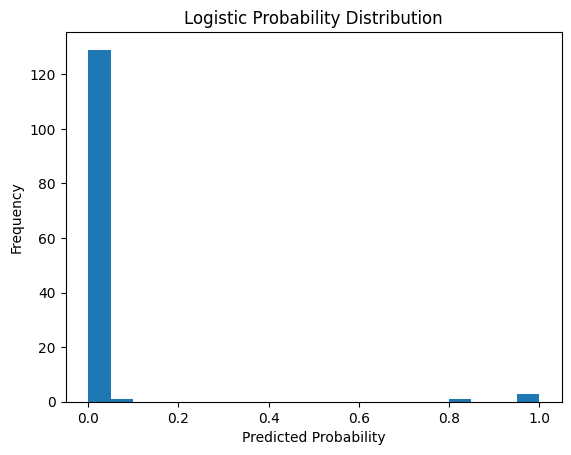

In [21]:
plt.hist(log_probs, bins=20)
plt.title("Logistic Probability Distribution")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.show()

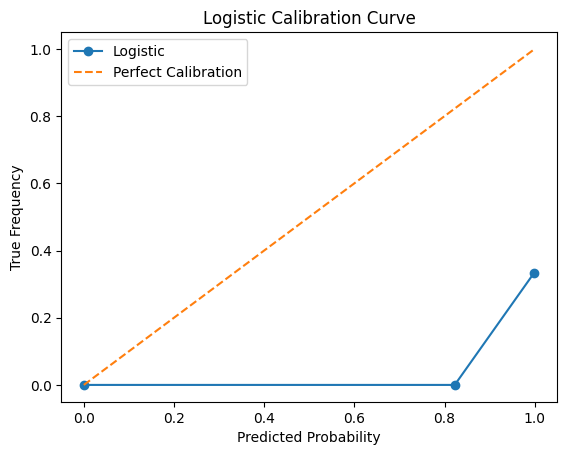

In [22]:
prob_true, prob_pred = calibration_curve(y_test_champion_predictor_df, log_probs, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o', label='Logistic')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect Calibration')
plt.xlabel("Predicted Probability")
plt.ylabel("True Frequency")
plt.legend()
plt.title("Logistic Calibration Curve")
plt.show()

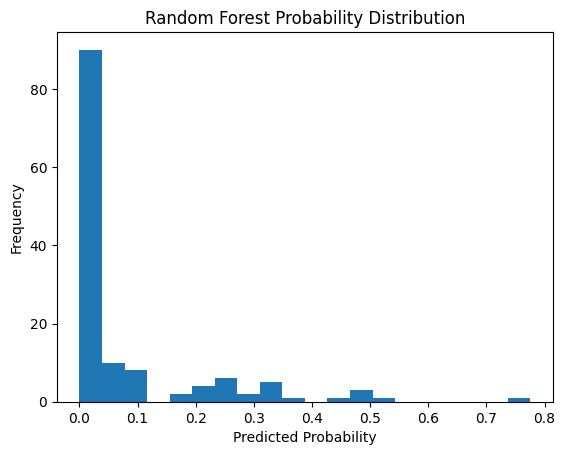

In [23]:
plt.hist(rf_probs, bins=20)
plt.title("Random Forest Probability Distribution")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.show()

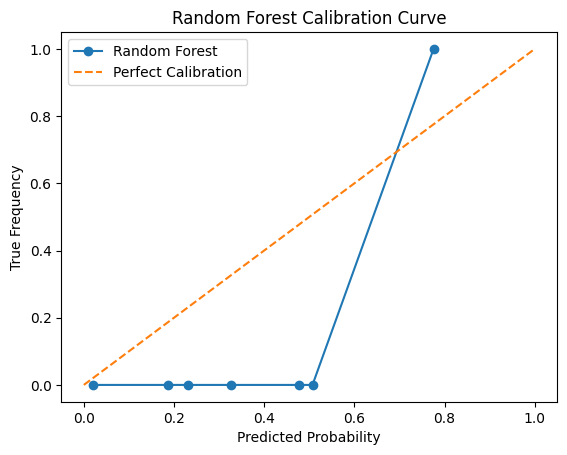

In [24]:
prob_true, prob_pred = calibration_curve(y_test_champion_predictor_df, rf_probs, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o', label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect Calibration')
plt.xlabel("Predicted Probability")
plt.ylabel("True Frequency")
plt.legend()
plt.title("Random Forest Calibration Curve")
plt.show()

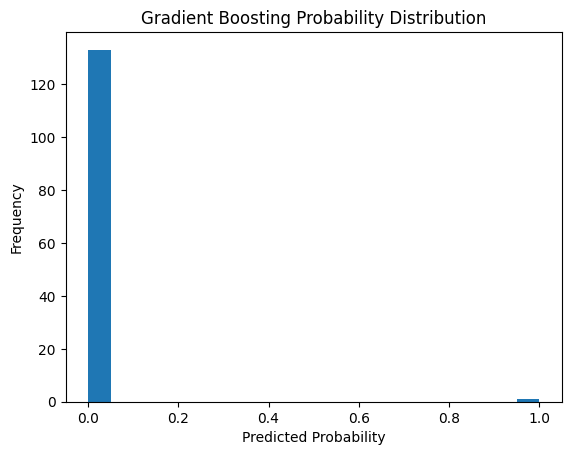

In [25]:
plt.hist(gb_probs, bins=20)
plt.title("Gradient Boosting Probability Distribution")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.show()

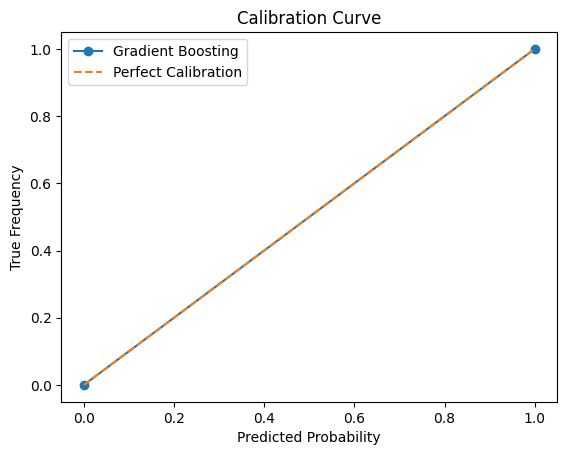

In [26]:
prob_true, prob_pred = calibration_curve(y_test_champion_predictor_df, gb_probs, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o', label='Gradient Boosting')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect Calibration')
plt.xlabel("Predicted Probability")
plt.ylabel("True Frequency")
plt.legend()
plt.title("Calibration Curve")
plt.show()

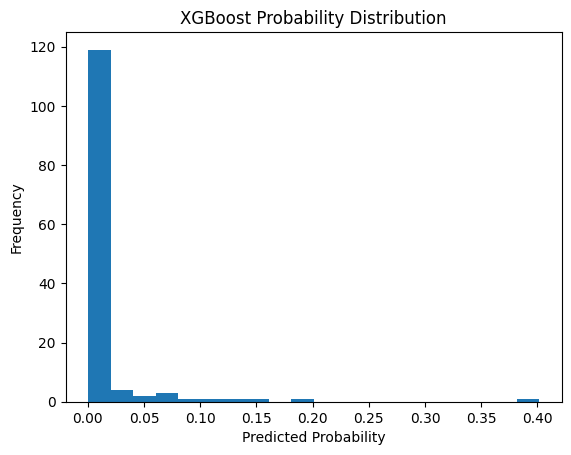

In [27]:
plt.hist(xgb_probs, bins=20)
plt.title("XGBoost Probability Distribution")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.show()

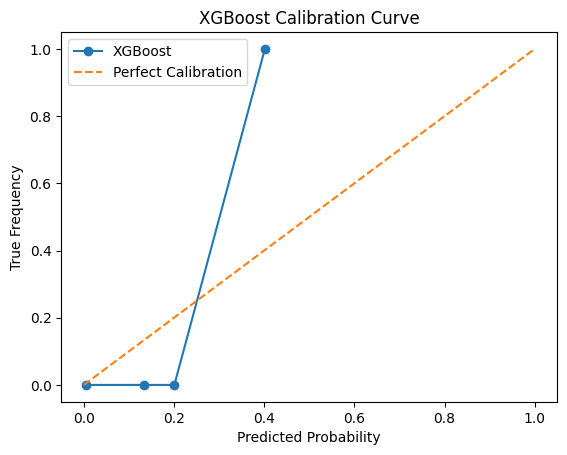

In [28]:
prob_true, prob_pred = calibration_curve(y_test_champion_predictor_df, xgb_probs, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o', label='XGBoost')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect Calibration')
plt.xlabel("Predicted Probability")
plt.ylabel("True Frequency")
plt.legend()
plt.title("XGBoost Calibration Curve")
plt.show()


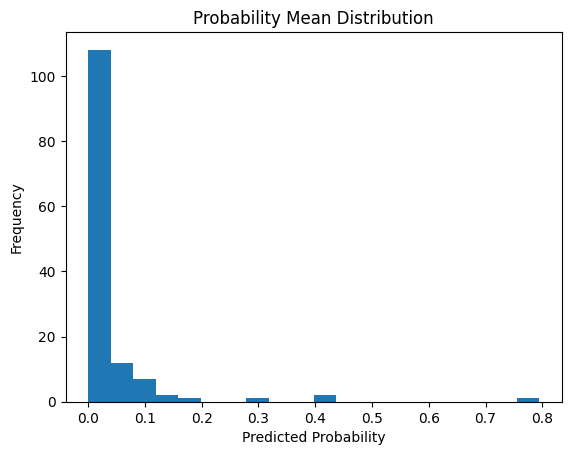

In [29]:
plt.hist(champion_predictor_probs["Prob Mean"], bins=20)
plt.title("Probability Mean Distribution")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.show()

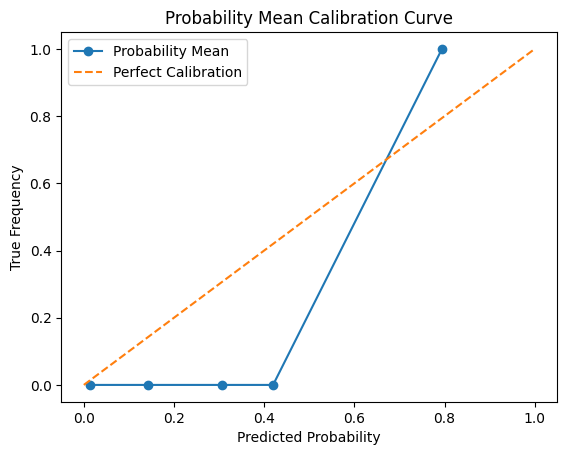

In [30]:
prob_true, prob_pred = calibration_curve(y_test_champion_predictor_df, champion_predictor_probs["Prob Mean"],
                                         n_bins=10)

plt.plot(prob_pred, prob_true, marker='o', label='Probability Mean')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect Calibration')
plt.xlabel("Predicted Probability")
plt.ylabel("True Frequency")
plt.legend()
plt.title("Probability Mean Calibration Curve")
plt.show()

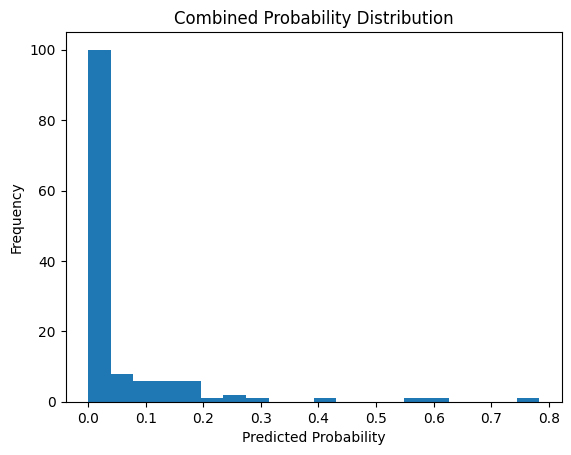

In [31]:
plt.hist(champion_predictor_probs["Combined"], bins=20)
plt.title("Combined Probability Distribution")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.show()

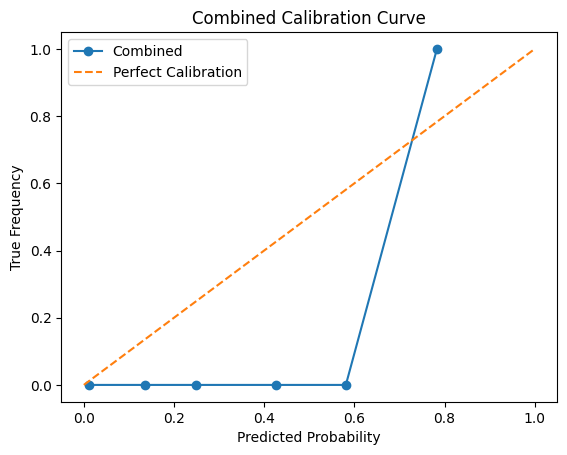

In [32]:
prob_true, prob_pred = calibration_curve(y_test_champion_predictor_df, champion_predictor_probs["Combined"],
                                         n_bins=10)

plt.plot(prob_pred, prob_true, marker='o', label='Combined')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect Calibration')
plt.xlabel("Predicted Probability")
plt.ylabel("True Frequency")
plt.legend()
plt.title("Combined Calibration Curve")
plt.show()

Descision:  Going to use the Random Forest and Combined Probablity as for the model.  Its distribution looks better and I am worried about overfitting based on how perfect the fits seem to be. 

# Create probs for the rest of the data so it can be used for later models

In [33]:
log_probs_train = LogReg.predict_proba(x_train_champion_predictor_df,)[:, 1] 

In [34]:
rf_probs_train = rf_model.predict_proba(x_train_champion_predictor_df,)[:, 1] 

In [35]:
gb_probs_train = gb_model.predict_proba(x_train_champion_predictor_df,)[:, 1] 

In [36]:
xgb_probs_train = xgb_model.predict_proba(x_train_champion_predictor_df,)[:, 1]

In [37]:
# Create DataFrame with all the probabilities created
champion_predictor_probs_train = pd.DataFrame({"Logistic": log_probs_train, "RanFor": rf_probs_train, "GradBoost": gb_probs_train,
                                               "XGBoost": xgb_probs_train})
# Create two combined probabiliti that takes all of them and puts them together.  1) Mean of the 4 and 2) A weighted scale
champion_predictor_probs_train  ["Prob Mean"] = champion_predictor_probs_train .mean(axis=1)
champion_predictor_probs_train ["Combined"] = (0.3 * champion_predictor_probs_train ["Logistic"] + 0.5 * champion_predictor_probs_train ["RanFor"] +
    0.025 * champion_predictor_probs_train ["GradBoost"] + 0.175 * champion_predictor_probs_train ["XGBoost"])

print(champion_predictor_probs_train)

           Logistic    RanFor     GradBoost   XGBoost  Prob Mean  Combined
0      6.973788e-62  0.399187  1.301728e-09  0.055459   0.113661  0.209299
1     2.272768e-106  0.001243  1.301728e-09  0.001354   0.000649  0.000858
2      1.171517e-74  0.001918  1.301728e-09  0.000370   0.000572  0.001024
3      1.376156e-71  0.001988  1.301728e-09  0.000602   0.000648  0.001099
4      5.157138e-68  0.011514  1.301728e-09  0.000612   0.003031  0.005864
...             ...       ...           ...       ...        ...       ...
1505   4.677287e-05  0.049806  1.301728e-09  0.007337   0.014298  0.026201
1506   2.949386e-04  0.145521  1.301728e-09  0.003962   0.037444  0.073542
1507   9.596682e-04  0.141014  1.301728e-09  0.004500   0.036618  0.071582
1508   8.811354e-01  0.776817  9.999998e-01  0.303222   0.740293  0.730813
1509   4.183276e-02  0.288448  1.301728e-09  0.015328   0.086402  0.159456

[1510 rows x 6 columns]


In [38]:
log_probs_train_scaled = LogReg.predict_proba(x_train_champion_predictor_df_scaled,)[:, 1] 
rf_probs_train_scaled = rf_model.predict_proba(x_train_champion_predictor_df_scaled,)[:, 1] 
gb_probs_train_scaled = gb_model.predict_proba(x_train_champion_predictor_df_scaled,)[:, 1] 
xgb_probs_train_scaled = xgb_model.predict_proba(x_train_champion_predictor_df_scaled,)[:, 1]

# Create DataFrame with all the probabilities created
champion_predictor_probs_train_scaled = pd.DataFrame({"Logistic": log_probs_train_scaled, "RanFor": rf_probs_train_scaled, "GradBoost": gb_probs_train_scaled,
                                               "XGBoost": xgb_probs_train_scaled})
# Create two combined probabiliti that takes all of them and puts them together.  1) Mean of the 4 and 2) A weighted scale
champion_predictor_probs_train_scaled["Prob Mean"] = champion_predictor_probs_train_scaled.mean(axis=1)
champion_predictor_probs_train_scaled["Combined"] = (0.3 * champion_predictor_probs_train_scaled["Logistic"] + 0.5 * champion_predictor_probs_train_scaled["RanFor"] +
    0.025 * champion_predictor_probs_train_scaled["GradBoost"] + 0.175 * champion_predictor_probs_train_scaled["XGBoost"])

print(champion_predictor_probs_train_scaled)

      Logistic    RanFor     GradBoost   XGBoost  Prob Mean  Combined
0     0.620361  0.279759  9.999998e-01  0.038943   0.484766  0.357803
1     0.002531  0.097072  1.301728e-09  0.005449   0.026263  0.050249
2     0.039004  0.106020  1.301728e-09  0.007055   0.038020  0.065946
3     0.238965  0.141744  9.999998e-01  0.010651   0.347840  0.169425
4     0.124641  0.133096  9.999998e-01  0.007207   0.316236  0.130201
...        ...       ...           ...       ...        ...       ...
1505  0.986462  0.166468  1.301728e-09  0.011005   0.290984  0.381098
1506  0.988651  0.100911  1.301728e-09  0.006937   0.274125  0.348265
1507  0.995716  0.188120  9.999998e-01  0.009927   0.548441  0.419512
1508  0.996437  0.296496  9.999998e-01  0.018103   0.577759  0.475347
1509  0.990926  0.158328  1.301728e-09  0.009927   0.289795  0.378179

[1510 rows x 6 columns]


# Add the combined probability to the train and test datasets

In [39]:
train_bracket_set = train_bracket_set.copy()  # critical safeguard
train_bracket_set.loc[:, 'Random Forest'] = champion_predictor_probs_train['RanFor'].values
train_bracket_set.loc[:, 'Combined'] = champion_predictor_probs_train['Combined'].values
train_bracket_set = train_bracket_set.reset_index(drop=True)
champion_predictor_probs_train = champion_predictor_probs_train.reset_index(drop=True)
print(train_bracket_set[['Team', 'Random Forest', 'Combined']].head())
print(train_bracket_set[['Random Forest', 'Combined']].isna().sum())
test_bracket_set = test_bracket_set.reset_index(drop=True)
test_bracket_set
test_bracket_set = test_bracket_set.copy() # critical safeguard
test_bracket_set['Random Forest'] = champion_predictor_probs['RanFor'].values
test_bracket_set['Combined'] = champion_predictor_probs['Combined'].values
print(champion_predictor_probs['RanFor'].dtype)
print(champion_predictor_probs['RanFor'].isna().sum())
print(train_bracket_set[['Team', 'Random Forest', 'Combined']].head())

               Team  Random Forest  Combined
0       Connecticut       0.399187  0.209299
1           Stetson       0.001243  0.000858
2  Florida Atlantic       0.001918  0.001024
3      Northwestern       0.001988  0.001099
4   San Diego State       0.011514  0.005864
Random Forest    0
Combined         0
dtype: int64
float64
0
               Team  Random Forest  Combined
0       Connecticut       0.399187  0.209299
1           Stetson       0.001243  0.000858
2  Florida Atlantic       0.001918  0.001024
3      Northwestern       0.001988  0.001099
4   San Diego State       0.011514  0.005864


In [40]:
output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Variable Creation Sheet Work addresses\test_bracket_set.csv"
test_bracket_set.to_csv(output_path, index=False)


# NBA Draft Metrics

In [41]:
draft_data_filtered

,Pick Number,Player,School,Class,Year
0,1.0,Anthony Davis,Kentucky,Fr.,2012
1,2.0,Bradley Beal,Florida,Fr.,2012
2,3.0,Michael Kidd-Gil...,Kentucky,Fr.,2012
3,4.0,Harrison Barnes,North Carolina,So.,2012
4,5.0,Thomas Robinson,Kansas,Jr.,2012
...,...,...,...,...,...
875,56.0,Chucky Hepburn,Louisville,Sr.,2025
876,57.0,Brice Williams,Nebraska,Sr.,2025
877,58.0,Amari Williams,Kentucky,Sr.,2025
878,59.0,Mark Sears,Alabama,Sr.,2025


In [42]:
team_draft_metrics =[]

# Convert each grade into a number
draft_data_filtered.loc[:, "Years_Post_HS"] = draft_data_filtered["Class"].map({
    "Fr.": 1, "So.": 2, "Jr.": 3, "Sr.": 4, "HSSr.": 0})

# Drop NaN as seen in 879 for forfeited pick and alike
draft_data_filtered = draft_data_filtered.dropna(subset=["Year", "School"])

# Create Inverse Pick column
draft_data_filtered["Inverse_Pick_Score"] = 1 / draft_data_filtered["Pick Number"]

# Group by Year and School, then count
grouped = draft_data_filtered.groupby(["Year", "School"]).agg(
    Draft_Pick_Count = ("Pick Number", "count"),
    Total_Pick_Score = ("Pick Number", "sum"),
    Avg_Pick_Number = ("Pick Number", "mean"),
    Inverse_Pick_Sum = ("Inverse_Pick_Score", "sum")
).reset_index()

# Convert each row into a dictionary and append to the list
for _, row in grouped.iterrows():
    team_draft_metrics.append({
        "Year": row["Year"],
        "School": row["School"],
        "Draft_Pick_Count": row["Draft_Pick_Count"],
        "Total_Pick_Score": row["Total_Pick_Score"],
        "Avg_Pick_Number": row["Avg_Pick_Number"],
        "Inverse_Pick_Sum": row["Inverse_Pick_Sum"]})

team_draft_metrics_df = pd.DataFrame(team_draft_metrics)

team_draft_metrics_df = team_draft_metrics_df.rename(columns={"School": "Team"})

print(team_draft_metrics_df.head())
print(team_draft_metrics_df.sort_values("Inverse_Pick_Sum", ascending=False).head(10))


   Year            Team  Draft_Pick_Count  Total_Pick_Score  Avg_Pick_Number  \
0  2012         Alabama                 1              55.0        55.000000   
1  2012          Baylor                 3             100.0        33.333333   
2  2012  Czech Republic                 1              56.0        56.000000   
3  2012            Duke                 2              49.0        24.500000   
4  2012         Florida                 1               2.0         2.000000   

   Inverse_Pick_Sum  
0          0.018182  
1          0.101361  
2          0.017857  
3          0.125641  
4          0.500000  
     Year      Team  Draft_Pick_Count  Total_Pick_Score  Avg_Pick_Number  \
14   2012  Kentucky                 6             110.0        18.333333   
302  2019      Duke                 3              12.0         4.000000   
516  2025      Duke                 5              94.0        18.800000   
471  2024      Duke                 5              98.0        19.600000   
97   20

C:\Users\Colt Meyer\AppData\Local\Temp\ipykernel_19484\2447527143.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  draft_data_filtered["Inverse_Pick_Score"] = 1 / draft_data_filtered["Pick Number"]


In [43]:
bracket_data_set = pd.concat([train_bracket_set, test_bracket_set], ignore_index=True)
bracket_data_set

,Year,Team,Seed,Current Round,Score,Opponenet Score,Opponent Seed,Result,Champion,Win Percentage,...,Coach_Winning_Percentage,CO_NCAA_Tourney_Appear,CO_S16_Appear,CO_FF_Appear,CO_Chmp_Appear,ORtg,DRtg,SoS_DRtg,Random Forest,Combined
0,2024,Connecticut,1,64,91,52,16,1,0,0.925,...,0.642,6.0,2.0,2.0,2.0,96.0,91.1,100.8,0.399187,0.209299
1,2024,Stetson,16,64,52,91,1,0,0,0.629,...,0.530,1.0,0.0,0.0,0.0,108.3,114.3,108.6,0.001243,0.000858
2,2024,Florida Atlantic,8,64,65,77,9,0,0,0.735,...,0.646,2.0,1.0,1.0,0.0,103.9,102.1,104.1,0.001918,0.001024
3,2024,Northwestern,9,64,77,65,8,1,0,0.647,...,0.504,3.0,0.0,0.0,0.0,104.7,99.5,101.7,0.001988,0.001099
4,2024,San Diego State,5,64,69,65,12,1,0,0.703,...,0.753,5.0,2.0,1.0,0.0,97.8,94.0,101.7,0.011514,0.005864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,2025,Florida,1,4,79,73,1,1,0,0.900,...,0.658,3.0,1.0,1.0,1.0,98.6,91.8,99.5,0.493339,0.574576
1640,2025,Duke,1,4,67,70,1,0,0,0.897,...,0.802,3.0,2.0,1.0,0.0,94.3,90.8,101.9,0.312690,0.165503
1641,2025,Houston,1,4,70,67,1,1,0,0.875,...,0.700,21.0,9.0,3.0,0.0,92.5,86.8,99.4,0.331653,0.425185
1642,2025,Florida,1,2,65,63,1,1,1,0.900,...,0.658,3.0,1.0,1.0,1.0,98.6,91.8,99.5,0.775650,0.783094


In [44]:
bracket_data_set_addnba = bracket_data_set.merge(
    team_draft_metrics_df, on=["Year", "Team"], how="left")

# Fill missing values with 0
bracket_data_set_addnba[["Draft_Pick_Count", "Total_Pick_Score", "Avg_Pick_Number", "Inverse_Pick_Sum"]] = bracket_data_set_addnba[
    ["Draft_Pick_Count", "Total_Pick_Score", "Avg_Pick_Number", "Inverse_Pick_Sum"]].fillna(0)


In [45]:
bracket_data_set = bracket_data_set_addnba
output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Variable Creation Sheet Work addresses\bracket_data_set.csv"
bracket_data_set.to_csv(output_path, index=False)

# Evan Miya Metrics

In [46]:
evan_miya_all_years_filtered

,Rank,Name,Team,OBPR,DBPR,BPR,Box OBPR,Box DBPR,Box BPR,Adj Team Off Eff,Adj Team Def Eff,Adj Team Eff Margin,+/-,Season
0,1,Dion Waiters,Syracuse,4.00,3.71,7.71,3.23,1.88,5.10,115.1,85.6,29.5,306.0,2012.0
1,2,Anthony Davis,Kentucky,4.08,3.35,7.43,3.72,3.68,7.40,119.5,89.1,30.3,461.0,2012.0
2,3,Jared Sullinger,Ohio State,3.45,3.30,6.75,3.41,2.32,5.73,114.6,84.8,29.8,360.0,2012.0
3,4,Mike Bruesewitz,Wisconsin,3.90,2.71,6.61,1.88,0.95,2.83,115.4,85.3,30.1,263.0,2012.0
4,5,Joe Ragland,Wichita State,5.04,1.37,6.41,3.83,0.22,4.05,117.5,93.3,24.1,289.0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37247,2979,George Ivory,Mississippi Valley State,-4.00,-2.47,-6.47,-2.20,-0.52,-2.72,73.9,123.6,-49.7,-315.0,2025.0
37248,2980,Antonio Sisk,Mississippi Valley State,-4.42,-2.16,-6.57,-3.55,-0.67,-4.22,78.0,119.8,-41.8,-491.0,2025.0
37249,2981,Donovan Sanders,Mississippi Valley State,-4.41,-2.32,-6.73,-3.94,-0.66,-4.60,78.1,122.0,-43.9,-668.0,2025.0
37250,2982,Alvin Stredic,Mississippi Valley State,-4.97,-3.22,-8.18,-3.51,-1.00,-4.51,78.6,121.2,-42.6,-604.0,2025.0


In [47]:
team_player_metrics =[]

# Drop NaN
evan_miya_all_years_filtered = evan_miya_all_years_filtered.dropna(subset=["Season", "Team"])

# Reset Index
evan_miya_all_years_filtered = evan_miya_all_years_filtered.reset_index(drop=True)

# Create Inverse Pick column
evan_miya_all_years_filtered["Inverse Rank"] = 1 / evan_miya_all_years_filtered["Rank"]
evan_miya_all_years_filtered["Eff_Sum"] = (evan_miya_all_years_filtered["Adj Team Off Eff"] + 
                                               evan_miya_all_years_filtered["Adj Team Def Eff"])
evan_miya_all_years_filtered["Net_Eff_Dev"] = (evan_miya_all_years_filtered["Eff_Sum"] - 
                                                   evan_miya_all_years_filtered["Adj Team Eff Margin"])
# Group by Year and School, then count
grouped = evan_miya_all_years_filtered.groupby(["Season", "Team"]).agg(
    Ranked_Player_Count = ("Rank", "count"),
    Total_Rank_Score = ("Rank", "sum"),
    Avg_Rank_Score = ("Rank", "mean"),
    Inverse_Rank_Sum = ("Inverse Rank", "sum"),
    Avg_Plus_Minus = ("+/-" , "mean"),
    Avg_Bayesian_PR = ("BPR" , "mean"),
    Net_Eff_Dev=("Net_Eff_Dev", "mean")  
).reset_index()

# Starting 5 Metrics
def Start5_Metrics(df, stat_column):
    return df.nlargest(5, stat_column)[stat_column].mean()

start5_metrics = []
for (year, school), group in evan_miya_all_years_filtered.groupby(["Season", "Team"]):
    start5_metrics.append({
        "Season": year,
        "Team": school,
        "Starting5_BPR": Start5_Metrics(group, "BPR"),
        "Starting5_DBPR": Start5_Metrics(group, "DBPR"),
        "Starting5_OBPR": Start5_Metrics(group, "OBPR"),
        "Starting5_Plus_Minus": Start5_Metrics(group, "+/-")
    })
start5_df = pd.DataFrame(start5_metrics)

# Bench Metrics - Players outside of starting 5
bench_metrics = []
for (year, school), group in evan_miya_all_years_filtered.groupby(["Season", "Team"]):
    bench = group.sort_values("Rank", ascending=False).iloc[5:]
    bench_metrics.append({
        "Season": year,
        "Team": school,
        "Bench_BPR": bench["BPR"].mean(),
        "Bench_DBPR": bench["DBPR"].mean(),
        "Bench_OBPR": bench["OBPR"].mean(),
        "Bench_Plus_Minus": bench["+/-"].mean()
    })
bench_df = pd.DataFrame(bench_metrics)

# Bring grouped, start5 and bench together inot team_player_metric
team_player_metrics = (grouped.merge(start5_df, on=["Season", "Team"], how="left")
    .merge(bench_df, on=["Season", "Team"], how="left")
    .rename(columns={"Team": "Team"}))

team_player_metrics = team_player_metrics.rename(columns={"Season": "Year"})


print(team_player_metrics.head())

     Year           Team  Ranked_Player_Count  Total_Rank_Score  \
0  2012.0      Air Force                    7              8379   
1  2012.0          Akron                    9              8451   
2  2012.0        Alabama                    9              5428   
3  2012.0    Alabama A&M                    6             13259   
4  2012.0  Alabama State                    9             21345   

   Avg_Rank_Score  Inverse_Rank_Sum  Avg_Plus_Minus  Avg_Bayesian_PR  \
0     1197.000000          0.008703      -15.857143         0.667143   
1      939.000000          0.017149      114.777778         1.348889   
2      603.111111          0.046999      122.222222         2.405556   
3     2209.833333          0.003058     -107.166667        -2.286667   
4     2371.666667          0.003996      -85.000000        -2.744444   

   Net_Eff_Dev  Starting5_BPR  Starting5_DBPR  Starting5_OBPR  \
0   194.114286          1.052           0.848           0.544   
1   188.033333          2.512     

In [48]:
bracket_data_set_draft_rank = bracket_data_set_addnba.merge(
    team_player_metrics, on=["Year", "Team"],  how="left")

cols_to_fill = team_player_metrics.columns.drop(["Year", "Team"])
bracket_data_set_draft_rank[cols_to_fill] = bracket_data_set_draft_rank[cols_to_fill].fillna(0)

bracket_data_set_draft_rank

,Year,Team,Seed,Current Round,Score,Opponenet Score,Opponent Seed,Result,Champion,Win Percentage,...,Avg_Bayesian_PR,Net_Eff_Dev,Starting5_BPR,Starting5_DBPR,Starting5_OBPR,Starting5_Plus_Minus,Bench_BPR,Bench_DBPR,Bench_OBPR,Bench_Plus_Minus
0,2024,Connecticut,1,64,91,52,16,1,0,0.925,...,5.625556,178.200000,7.784,2.718,5.198,536.4,8.090000,2.780000,5.310000,522.000000
1,2024,Stetson,16,64,52,91,1,0,0,0.629,...,0.213750,218.850000,1.284,-0.562,2.140,13.6,2.000000,-0.793333,2.796667,8.000000
2,2024,Florida Atlantic,8,64,65,77,9,0,0,0.735,...,3.493750,190.275000,4.512,1.342,3.352,242.8,4.776667,1.153333,3.620000,256.666667
3,2024,Northwestern,9,64,77,65,8,1,0,0.647,...,2.991429,192.657143,3.896,1.276,2.620,138.8,4.440000,1.130000,3.310000,136.000000
4,2024,San Diego State,5,64,69,65,12,1,0,0.703,...,3.331250,180.350000,3.794,1.982,2.142,167.6,4.110000,1.836667,2.270000,179.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,2025,Florida,1,4,79,73,1,1,0,0.900,...,5.427500,174.662500,6.874,2.564,4.470,491.8,7.420000,2.563333,4.856667,485.333333
1640,2025,Duke,1,4,67,70,1,0,0,0.897,...,6.517000,172.370000,7.728,3.026,5.268,566.4,7.728000,2.720000,5.008000,566.400000
1641,2025,Houston,1,4,70,67,1,1,0,0.875,...,5.988750,164.412500,6.728,3.548,3.706,434.6,7.186667,3.933333,3.253333,431.333333
1642,2025,Florida,1,2,65,63,1,1,1,0.900,...,5.427500,174.662500,6.874,2.564,4.470,491.8,7.420000,2.563333,4.856667,485.333333


In [49]:
output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Variable Creation Sheet Work addresses\bracket_data_set_draft_rank.csv"
bracket_data_set_draft_rank.to_csv(output_path, index=False)

bracket_data_set = bracket_data_set_draft_rank

output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Variable Creation Sheet Work addresses\bracket_data_set.csv"
bracket_data_set.to_csv(output_path, index=False)

In [50]:
bracket_data_set.columns

Index(['Year', 'Team', 'Seed', 'Current Round', 'Score', 'Opponenet Score',
       'Opponent Seed', 'Result', 'Champion', 'Win Percentage', 'SRS_basic',
       'SOS_basic', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%',
       'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'Pace', 'ORtg_x', 'FTr',
       '3PAr', 'TS%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'eFG%', 'TOV%', 'ORB%',
       'FT/FGA', 'Rank', 'NetRtg', 'ORtg_y', 'AdjT', 'Luck', 'SoS_NetRtg',
       'SoS_ORtg', 'NCSOS_NetRtg', 'Current_AP_Pre', 'Current_W-L%',
       'Coach_Winning_Percentage', 'CO_NCAA_Tourney_Appear', 'CO_S16_Appear',
       'CO_FF_Appear', 'CO_Chmp_Appear', 'ORtg', 'DRtg', 'SoS_DRtg',
       'Random Forest', 'Combined', 'Draft_Pick_Count', 'Total_Pick_Score',
       'Avg_Pick_Number', 'Inverse_Pick_Sum', 'Ranked_Player_Count',
       'Total_Rank_Score', 'Avg_Rank_Score', 'Inverse_Rank_Sum',
       'Avg_Plus_Minus', 'Avg_Bayesian_PR', 'Net_Eff_Dev', 'Starting5_BPR',
       'Starting5_DBPR', 'Starti

# Teamwork Metric Creation

In [51]:
# Passes that lead to points vs. loss of possession
bracket_data_set["Pass_Score"] = (bracket_data_set["AST%"] - bracket_data_set["TOV%"])
# Defensive Stops
bracket_data_set["Def_Sync_Score"] = (bracket_data_set["STL%"] + bracket_data_set["BLK%"])
# BPR Team Balance
bracket_data_set["BPR_Spread"] = abs(bracket_data_set["Starting5_BPR"] - bracket_data_set["Bench_BPR"])
bracket_data_set["Scoring_Cohesion"] = 1 / (1 + bracket_data_set["BPR_Spread"])
# Final Teamwork Metric
bracket_data_set["Teamwork_Index"] = (.4*bracket_data_set["Pass_Score"] + .3*bracket_data_set["Def_Sync_Score"] +
                                      .3*bracket_data_set["Scoring_Cohesion"])

In [52]:
bracket_data_set

,Year,Team,Seed,Current Round,Score,Opponenet Score,Opponent Seed,Result,Champion,Win Percentage,...,Starting5_Plus_Minus,Bench_BPR,Bench_DBPR,Bench_OBPR,Bench_Plus_Minus,Pass_Score,Def_Sync_Score,BPR_Spread,Scoring_Cohesion,Teamwork_Index
0,2024,Connecticut,1,64,91,52,16,1,0,0.925,...,536.4,8.090000,2.780000,5.310000,522.000000,51.3,23.5,0.306000,0.765697,27.799709
1,2024,Stetson,16,64,52,91,1,0,0,0.629,...,13.6,2.000000,-0.793333,2.796667,8.000000,35.3,15.9,0.716000,0.582751,19.064825
2,2024,Florida Atlantic,8,64,65,77,9,0,0,0.735,...,242.8,4.776667,1.153333,3.620000,256.666667,37.1,18.0,0.264667,0.790722,20.477217
3,2024,Northwestern,9,64,77,65,8,1,0,0.647,...,138.8,4.440000,1.130000,3.310000,136.000000,47.6,20.2,0.544000,0.647668,25.294301
4,2024,San Diego State,5,64,69,65,12,1,0,0.703,...,167.6,4.110000,1.836667,2.270000,179.000000,36.4,22.8,0.316000,0.759878,21.627964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,2025,Florida,1,4,79,73,1,1,0,0.900,...,491.8,7.420000,2.563333,4.856667,485.333333,39.2,22.2,0.546000,0.646831,22.534049
1640,2025,Duke,1,4,67,70,1,0,0,0.897,...,566.4,7.728000,2.720000,5.008000,566.400000,46.5,21.0,0.000000,1.000000,25.200000
1641,2025,Houston,1,4,70,67,1,1,0,0.875,...,434.6,7.186667,3.933333,3.253333,431.333333,33.3,28.0,0.458667,0.685558,21.925667
1642,2025,Florida,1,2,65,63,1,1,1,0.900,...,491.8,7.420000,2.563333,4.856667,485.333333,39.2,22.2,0.546000,0.646831,22.534049


In [53]:
output_path = r"C:\Users\Colt Meyer\OneDrive\Documents\Academics\MSDS\DTSC 691 - Capstone Project\Machine Learning Project\Data Sets\Variable Creation Sheet Work addresses\bracket_data_set.csv"
bracket_data_set.to_csv(output_path, index=False)

From analysis of the first interation the following features are to be eliminated. F < 0.9 & P > 0.05
Round 1 of Eliminations
